In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from lane_detection import *
from lane_following import *
from math import *

In [2]:
img = cv2.imread("/home/keshav/cv-intro/media/rov_pool.jpeg")

In [3]:
lines = detect_lines(img, 49, 50, 3, 500, 40)
print(lines)

[[[ 805  475 1138 1053]]

 [[1325  478 1895  685]]

 [[ 751  506  920 1061]]]


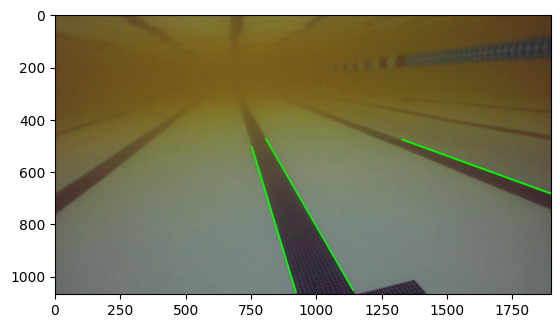

In [4]:
plt.imshow(draw_lines(img, lines))

In [5]:
get_slopes_intercepts(lines)

([1.7357357357357357, 0.3631578947368421, 3.2840236686390534],
 [1775.7698961937717, 5956.59420289855, 1254.6504504504505])

In [6]:
lanes = detect_lanes(lines)
print(lanes)

[[[1775.7698961937717, 2160, 670.4402235662722, 241.43978745136724], [1254.6504504504505, 2160, 670.4402235662722, 241.43978745136724]]]


1
___
[[1775.7698961937717, 2160, 670.4402235662722, 241.43978745136724], [1254.6504504504505, 2160, 670.4402235662722, 241.43978745136724]]
___
[[1775.7698961937717, 2160, 670.4402235662722, 241.43978745136724], [1254.6504504504505, 2160, 670.4402235662722, 241.43978745136724]]


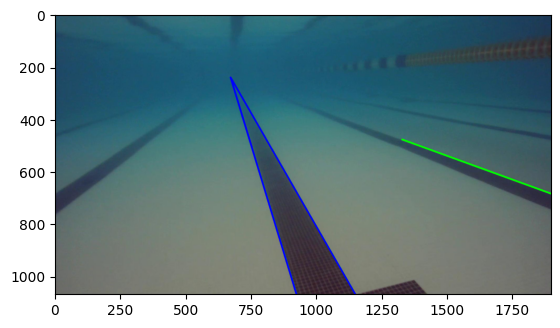

In [7]:
print(len(lanes))
lane_img = draw_lanes(img, lanes)
plt.imshow(cv2.cvtColor(lane_img, cv2.COLOR_BGR2RGB))
plt.show()

[[[1775.7698961937717, 2160, 670.4402235662722, 241.43978745136724], [1254.6504504504505, 2160, 670.4402235662722, 241.43978745136724]]]


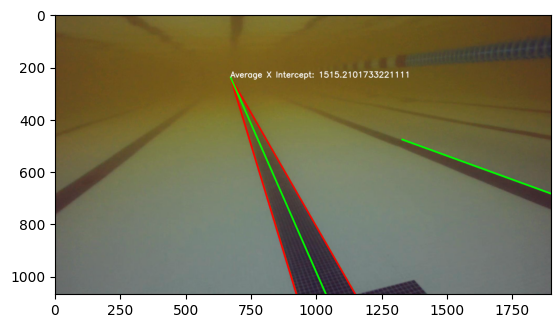

In [8]:
print(lanes)
center_lane = get_center_lane(lanes)
x = center_lane[0][2]
y = center_lane[0][3]
intercept, slope = get_lane_center(get_center_lane(lanes))
avg_x_str = "Average X Intercept: " + str(intercept)
avg_slope_str = "Average Slope: " + str(slope)
cv2.line(img, (int(intercept), 2160), (int(x),int(y)), (0,255,0), 5)
bottom_leg = x - intercept
right_leg = y
angle = atan(right_leg / bottom_leg)
plt.imshow(img)

In [9]:
video = cv2.VideoCapture('/home/keshav/cv-intro/media/AUV_Vid1.mkv')

fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'output_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

ret = True
while ret:
    ret, frame = video.read()
    lines = detect_lines(frame, 49, 50, 3, 500, 40)
    # print(lines)
        #try: 
        #    frame = draw_lines(frame, lines,(0, 255, 0))
        #    print ("tried to draw lines")
        #except :
       #     pass
    try:
        lanes = detect_lanes(lines)
        # print ("tried to detect lanes")
        closest_lane = get_center_lane(lanes)
        frame = draw_lane(frame, closest_lane, (255, 0, 0))
        avg_x_intercept, avg_slope = get_lane_center(closest_lane)
        avg_x_str = "Average X Intercept" + avg_x_intercept
        avg_slope_str = "Average Slope" + avg_slope
        x = closest_lane[0][2]
        y = closest_lane[0][3]
        angle = atan(avg_slope)
        cv2.line(frame, (int(avg_x_intercept), 1080), (int(x), int(y)), (0,0,255), 3)
        cv2.putText(frame, avg_x_str, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(frame, avg_slope_str, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        print(recommend_direction(avg_x_intercept, avg_slope))
        plt.imshow(frame)
        output_video.write(frame)
    except:
        pass
        
        
    # recommend_direction(avg_x_intercept, avg_slope)
    

video.release()
output_video.release()

/home/keshav/cv-intro/lane_detection/lane_detection.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2 - y1) / (x2 - x1)
/home/keshav/cv-intro/lane_detection/lane_detection.py:71: RuntimeWarning: invalid value encountered in scalar divide
  x = (slopes[i] * intercepts[i] - slopes[j] * intercepts[j]) / (
/home/keshav/cv-intro/lane_detection/lane_detection.py:54: RuntimeWarning: invalid value encountered in scalar divide
  slope_ratio = abs(min_slope / max_slope)
/home/keshav/cv-intro/lane_detection/lane_detection.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  x_intercept = (res - y2) / slope + x2
/home/keshav/cv-intro/lane_detection/lane_detection.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  slope_difference = abs(1 / slopes[i] - 1 / slopes[j])
/home/keshav/cv-intro/lane_detection/lane_detection.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  slope_ratio = abs(min_slope / max_slope)
/home/ke

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
